In [2]:
import ROOT

Welcome to JupyROOT 6.20/02


In [31]:
path = "/lustre/cms/store/user/adiflori/jpsikk_DataRunII_UltraLegacy_miniAODv2_v1_m4To6/Charmonium/crab_Charmonium_Run2018D-UL2018_MiniAODv2-v1_MINIAOD__1SKK_20220512_114449/220512_094551/0000/rootuple.root"

In [32]:
data = ROOT.RDataFrame("rootuple/CandidateTree", path)

In [35]:
cut = data.Filter("candidate_charge == 0")\
          .Filter("candidate_cosAlpha * candidate_cosAlpha > 0.99 * 0.99")\
          .Filter("candidate_vProb > 0.05")\
          .Filter("candidate_lxy / candidate_lxyErr > 3.0")\
          .Filter("ditrack_mass > 1.014")\
          .Filter("ditrack_mass < 1.024")

hist1 = cut.Histo1D(("candidate_vMass", "candidate mass", 200, 5.25, 5.5), "candidate_vMass")

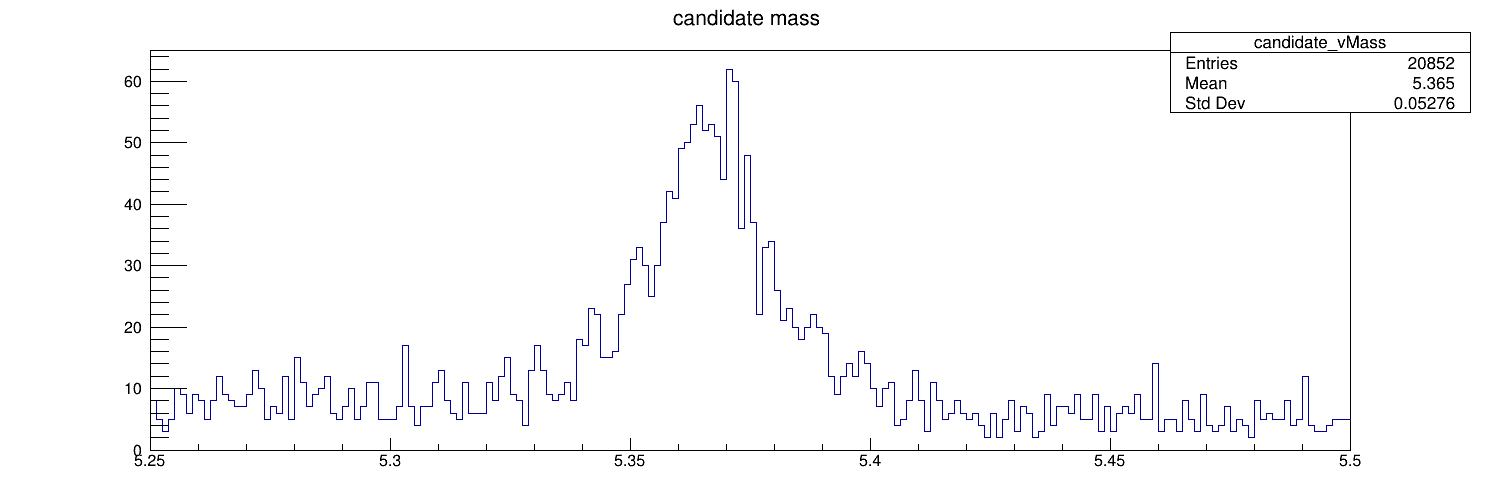

In [36]:
canvas1 = ROOT.TCanvas()
canvas1.SetCanvasSize(1500, 500)
hist1.Draw()
canvas1.Draw()

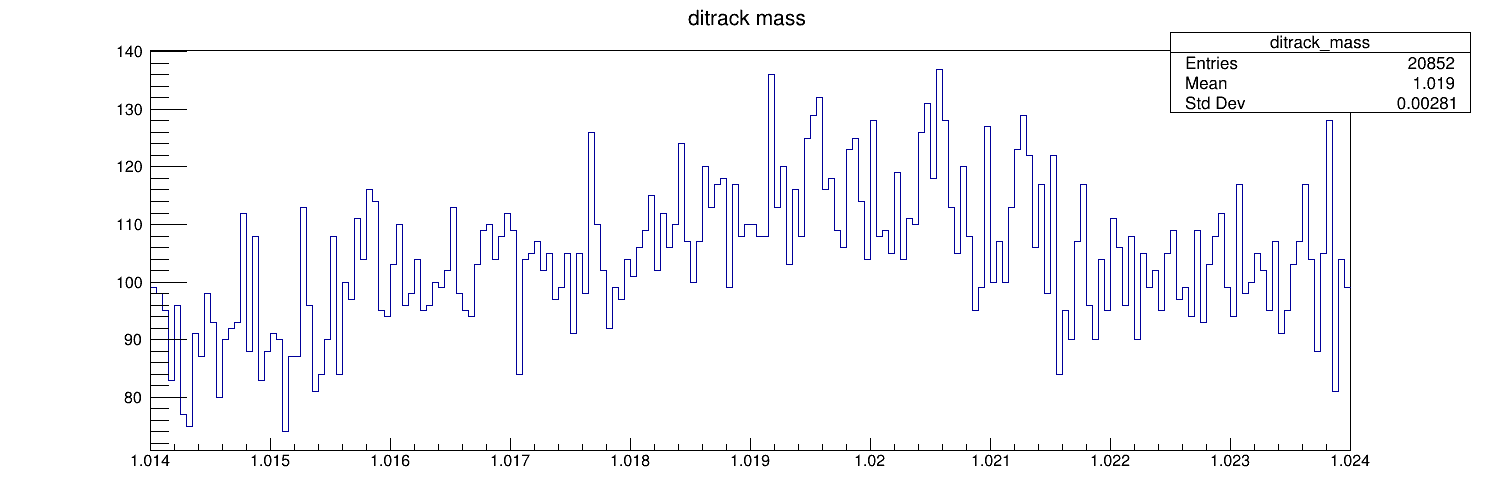

In [8]:
hist2 = cut.Histo1D(("ditrack_mass", "ditrack mass", 200, 1.014, 1.024), "ditrack_mass")
canvas2 = ROOT.TCanvas()
canvas2.SetCanvasSize(1500, 500)
hist2.Draw()
canvas2.Draw()

In [9]:
candidate_mass = data.AsNumpy(["candidate_vMass"])

/lustrehome/hdhoang2001/.conda/envs/new/lib/python3.8/site-packages/ROOT.py:421: FutureWarning: Instantiating a function template with parentheses ( f(type1, ..., typeN) ) is deprecated and will not be supported in a future version of ROOT. Instead, use square brackets: f[type1, ..., typeN]
  result_ptrs[column] = _root.ROOT.Internal.RDF.RDataFrameTake(column_type)(df_rnode, column)


In [37]:
canvas3 = ROOT.TCanvas()
xMin = hist1.GetXaxis().GetXmin()
xMax = hist1.GetXaxis().GetXmax()
nBins = hist1.GetNbinsX()

In [55]:
xVar = ROOT.RooRealVar("xVar", "m(JPsiPhi)", xMin, xMax)
xVar.setBins(nBins)
jpsiphiHist = ROOT.RooDataHist("JPsiPhi_Hist", hist1.GetTitle(), ROOT.RooArgSet(xVar), hist1)

TypeError: none of the 8 overloaded methods succeeded. Full details:
  RooDataHist::RooDataHist() =>
    takes at most 0 arguments (4 given)
  RooDataHist::RooDataHist(const char* name, const char* title, const RooArgSet& vars, const char* binningName = 0) =>
    could not convert argument 4
  RooDataHist::RooDataHist(const char* name, const char* title, const RooArgList& vars, const RooCmdArg& arg1, const RooCmdArg& arg2 = RooCmdArg(), const RooCmdArg& arg3 = RooCmdArg(), const RooCmdArg& arg4 = RooCmdArg(), const RooCmdArg& arg5 = RooCmdArg(), const RooCmdArg& arg6 = RooCmdArg(), const RooCmdArg& arg7 = RooCmdArg(), const RooCmdArg& arg8 = RooCmdArg()) =>
    could not convert argument 3
  RooDataHist::RooDataHist(const RooDataHist& other, const char* newname = 0) =>
    takes at most 2 arguments (4 given)
  RooDataHist::RooDataHist(const char* name, const char* title, const RooArgSet& vars, const RooAbsData& data, double initWgt = 1.) =>
    could not convert argument 4
  RooDataHist::RooDataHist(const char* name, const char* title, const RooArgList& vars, const TH1* hist, double initWgt = 1.) =>
    could not convert argument 3
  RooDataHist::RooDataHist(const char* name, const char* title, const RooArgList& vars, RooCategory& indexCat, map<string,TH1*> histMap, double initWgt = 1.) =>
    takes at least 5 arguments (4 given)
  RooDataHist::RooDataHist(const char* name, const char* title, const RooArgList& vars, RooCategory& indexCat, map<string,RooDataHist*> dhistMap, double wgt = 1.) =>
    takes at least 5 arguments (4 given)

In [44]:
mG = ROOT.RooRealVar("mean", "mean", 5.37, 5.23, 5.5)
sigma1 = ROOT.RooRealVar("sigma1", "sigma1", 0.016)
sigPDF = ROOT.RooGaussian("sigPDF", "Signal", xVar, mG, sigma1)

In [3]:
ROOT.gInterpreter.Declare("""
void fit()
{
    ROOT::RDataFrame d("rootuple/CandidateTree", "/lustre/cms/store/user/adiflori/jpsikk_DataRunII_UltraLegacy_miniAODv2_v1_m4To6/Charmonium/crab_Charmonium_Run2018D-UL2018_MiniAODv2-v1_MINIAOD__1SKK_20220512_114449/220512_094551/0000/rootuple.root");
    auto cut = d.Filter("candidate_charge == 0")
              .Filter("candidate_cosAlpha * candidate_cosAlpha > 0.99 * 0.99")
              .Filter("candidate_vProb > 0.05")
              .Filter("candidate_lxy / candidate_lxyErr > 3.0")
              .Filter("ditrack_mass > 1.014")
              .Filter("ditrack_mass < 1.024");
    auto hist1 = cut.Histo1D({"candidate_vMass", "candidate mass", 200, 5.25, 5.5}, "candidate_vMass");
    TCanvas canvas2;
    Double_t xMin = hist1->GetXaxis()->GetXmin();
    Double_t xMax = hist1->GetXaxis()->GetXmax();
    Int_t nBins = hist1->GetNbinsX();
    RooRealVar xVar("xVar", "m(JPsiPhi)", xMin, xMax);
    xVar.setBins(nBins);
    RooDataHist jpsiphiHist("JPsiPhi_Hist", hist1->GetTitle(), RooArgSet(xVar), RooFit::Import(*hist1, kFALSE));
    RooRealVar mG("mean", "mean", 5.37, 5.23, 5.5);
    RooRealVar sigma1("sigma1", "sigma1", 0.015);
    RooGaussian sigPDF("sigPDF", "Signal", xVar, mG, sigma1);
    sigPDF.fitTo(jpsiphiHist, RooFit::Extended(kTRUE));
    RooPlot* xframe = xVar.frame();
    jpsiphiHist.plotOn(xframe);
    sigPDF.plotOn(xframe);
    xframe->Draw();
    canvas2.Draw();
}
""")

True

In [4]:
ROOT.fit()


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean         5.37000e+00  2.70000e-02    5.23000e+00  5.50000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD         500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
[#0] ERROR:InputArguments -- sigPDF: this PDF doe